In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [ ]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [ ]:
mdata=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(mdata)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [ ]:
type(mdata)

tuple

In [ ]:
len(mdata)#train(학습데이터), test(테스트)

2

In [ ]:
len(mdata[0])#x, y 데이터 2개

2

In [ ]:
len(mdata[0][0])

60000

In [ ]:
type(mdata[0][0])

numpy.ndarray

In [ ]:
mdata[0][0].shape

(60000, 28, 28)

In [ ]:
img=mdata[0][0][0]
print(mdata[0][1][0])

5


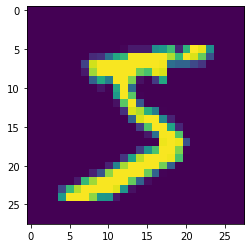

In [ ]:
plt.imshow(img)

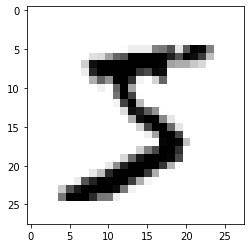

In [ ]:
plt.imshow(img, cmap=plt.cm.binary)

In [ ]:
def show_num(img, tag):
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel('tag: '+str(tag), size=40)
  plt.show()

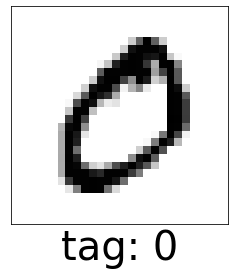

In [ ]:
img = mdata[0][0][1]
tag = mdata[0][1][1]
show_num(img, tag)

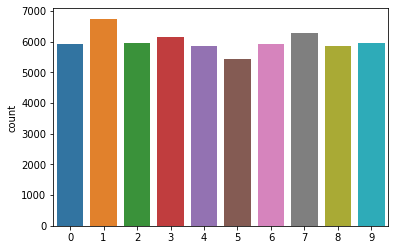

In [ ]:
sns.countplot(mdata[0][1])

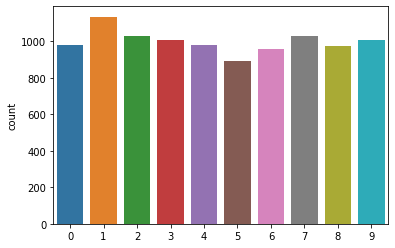

In [ ]:
sns.countplot(mdata[1][1])

In [ ]:
(x_train, y_train), (x_test, y_test)=mdata

In [ ]:
print(len(x_train))
print(len(x_test))

60000
10000


In [ ]:
x_train, x_test=x_train/255.0, x_test/255.0

In [ ]:
x_train[0].max()

1.0

In [ ]:
type(x_train)

numpy.ndarray

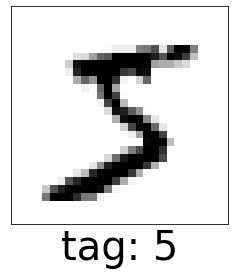

In [ ]:
show_num(x_train[0],y_train[0])

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2980 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1452 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1073 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0868 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0747 - accuracy: 0.9765


In [ ]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0668 - accuracy: 0.9790
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0586 - accuracy: 0.9812
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0532 - accuracy: 0.9820
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0482 - accuracy: 0.9839
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0452 - accuracy: 0.9853
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0412 - accuracy: 0.9862
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0387 - accuracy: 0.9872
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0375 - accuracy: 0.9871
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0321 - accuracy: 0.9888
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.032

In [ ]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 0s - loss: 0.0892 - accuracy: 0.9804


[0.08919274061918259, 0.980400025844574]

In [ ]:
result=model.predict(x_test)

In [ ]:
i=(result[0].max())

In [ ]:
result[0].tolist().index(i)

7

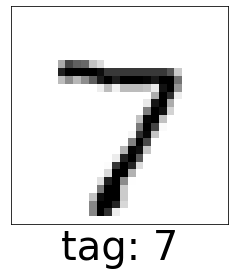

In [ ]:
show_num(x_test[0],y_test[0])